<a href="https://colab.research.google.com/github/lymoelopez/filipino-fake-news-detection/blob/main/preliminary%20work/dataSplit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import itertools

from sklearn.model_selection import train_test_split

from google.colab import files
import io
import matplotlib.pyplot as plt


# Data Preparation




In [ ]:
# import "Fake News Filipino" dataset
uploaded = files.upload()

Saving full.csv to full.csv


In [ ]:
#Read dataset
df = pd.read_csv(io.BytesIO(uploaded['full.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# output first 5 records
df.head()  

,label,article
0,0,"Ayon sa TheWrap.com, naghain ng kaso si Krupa,..."
1,0,Kilala rin ang singer sa pagkumpas ng kanyang ...
2,0,"BLANTYRE, Malawi (AP) -- Bumiyahe patungong Ma..."
3,0,"Kasama sa programa ang pananalangin, bulaklak ..."
4,0,Linisin ang Friendship Department dahil dadala...


([<matplotlib.patches.Wedge at 0x7f87303692e0>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Fake'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'True')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

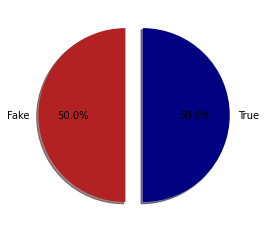

In [ ]:
# dataset distribution [pie chart]
fakeNewsCategory = pd.get_dummies(df.label)[1]  # 1 = fake, 0 = real
fakeNewsSize = fakeNewsCategory.sum()
realNewsSize = len(fakeNewsCategory)- fakeNewsSize

datasetSize = [fakeNewsSize, realNewsSize]

plt.pie(datasetSize,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

# Data Augmentation (w/ Back Translation)

In [ ]:
# import back-tanslated dataset
uploadedBT = files.upload()

Saving backTranslated.csv to backTranslated.csv


In [ ]:
#Read dataset
dfBT = pd.read_csv(io.BytesIO(uploadedBT['backTranslated.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# output first 5 records
dfBT.head()  

,label,article
0,0,"Ayon sa TheWrap.com, si Krupa, 35, ay nagsampa..."
1,0,Kilala rin ang mang-aawit sa pagkumpas ng kany...
2,0,"BLANTYRE, Malawi (AP) -- Naglakbay si Madonna ..."
3,0,"Kasama sa programa ang panalangin, bulaklak a..."
4,0,Linisin ang Friendship Department dahil bibis...


([<matplotlib.patches.Wedge at 0x7f872fe566a0>,
 [Text(-1.2000000000000002, 1.469576158976824e-16, 'Fake'),
  Text(1.2000000000000002, -2.939152317953648e-16, 'True')],
 [Text(-0.7, 8.572527594031472e-17, '50.0%'),
  Text(0.7, -1.7145055188062944e-16, '50.0%')])

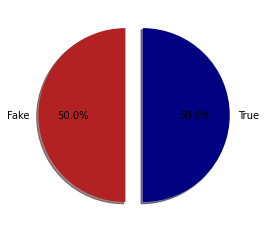

In [ ]:
# dataset distribution [pie chart]
fakeNewsCategoryBT = pd.get_dummies(dfBT.label)[1]  # 1 = fake, 0 = real
fakeNewsSizeBT = fakeNewsCategoryBT.sum()
realNewsSizeBT = len(fakeNewsCategoryBT)- fakeNewsSizeBT

datasetSizeBT = [fakeNewsSizeBT, realNewsSizeBT]

plt.pie(datasetSizeBT,explode=[0.1,0.1],colors=['firebrick','navy'],startangle=90,shadow=True,labels=['Fake','True'],autopct='%1.1f%%')

#Train-Test Split

In [ ]:
# 70 - 30 train test split
x_train1,x_testTemp,y_train1,y_testTemp=train_test_split(df['article'], labels, test_size=0.3, random_state=7)

In [ ]:
# use same random_state to split back translated dataset the same way
# we are only intrested in train split
# 70 - 30 train test split
x_trainBT,x_testBT,y_trainBT,y_testBT = train_test_split(dfBT['article'], labelsBT, test_size=0.3, random_state=7)

In [ ]:
x_train = x_train1.append(x_trainBT, ignore_index = True) #article
y_train = y_train1.append(y_trainBT, ignore_index = True) # label
print(x_train)

0       Ang Social Security Act of 2019, na nilikha ng...
1       Dismayado aniya ang mga pamilya ng mga biktima...
2       Hindi pa man nakakaupo bilang senador si ex-Ph...
3       Hindi na nagkapagpigil ang isa nating kababaya...
4       Ipinag-utos ni Pangulong Rodrigo Duterte sa Co...
                              ...                        
4483    ibinunyag ng pinuno ng tribo ang mga kalupitan...
4484    Good agricultural and livelihood news para sa ...
4485    "Ang akusado na si Juan Ponce Enrile, sa pamam...
4486    Sinabi ni Mendoza na binaril si Guliman matapo...
4487    Ito ang sinabi kahapon ni Bohol 2nd District R...
Name: article, Length: 4488, dtype: object


In [ ]:
#15-15 split train-validation 
x_val,x_test,y_val,y_test = train_test_split(x_testTemp, y_testTemp, test_size=0.5, random_state=7)

In [ ]:
print(x_val)

2011    Habang ang ilang media personalities ay kinuku...
2196    Tinanggap ng Bureau of Internal Revenue (BIR) ...
2657    Usap-usapan ngayon sa social media ang umano'y...
2147    Sa isang panayam sa ABC-CBN News kay Otso Dire...
196     Ang Protoevangelium of James ay ang pinagmulan...
                              ...                        
2950    Kinumpirma ng Department of Transportation (DO...
2646    MAYNILA, Pilipinas  -  Isa lamang biro ang pan...
1807    "Our lawyers have verified. A warrant of arres...
2654    Usap-usapan ngayon sa social media ang umano'y...
1911    Isang masigabong palakpakan ang naging tugon n...
Name: article, Length: 481, dtype: object


# save train-test-validaiton splits

In [ ]:
trainSplit= pd.concat([y_train,x_train],axis=1, join="inner")
print(trainSplit)

      label                                            article
0         1  Ang Social Security Act of 2019, na nilikha ng...
1         0  Dismayado aniya ang mga pamilya ng mga biktima...
2         1  Hindi pa man nakakaupo bilang senador si ex-Ph...
3         1  Hindi na nagkapagpigil ang isa nating kababaya...
4         1  Ipinag-utos ni Pangulong Rodrigo Duterte sa Co...
...     ...                                                ...
4483      1  ibinunyag ng pinuno ng tribo ang mga kalupitan...
4484      1  Good agricultural and livelihood news para sa ...
4485      0  "Ang akusado na si Juan Ponce Enrile, sa pamam...
4486      0  Sinabi ni Mendoza na binaril si Guliman matapo...
4487      0  Ito ang sinabi kahapon ni Bohol 2nd District R...

[4488 rows x 2 columns]


In [ ]:
testSplit= pd.concat([y_test,x_test],axis=1, join="inner")
testSplit.head()

,label,article
2162,1,Matapos mag-viral ang video ng Facebook page n...
1487,0,Sa isang resolusyon na nabuo sa kanilang nakar...
2964,1,Usap-usapan ngayon ang ibinahaging Facebook po...
3148,1,Matapos ang pasabog na rebelasyon ni Peter Joe...
691,0,"Sabi ng aming source sa ABS-CBN, ""Puro celebri..."


In [ ]:
validationSplit= pd.concat([y_val,x_val],axis=1, join="inner")

In [ ]:
trainSplit.to_csv('train.csv')

In [ ]:
testSplit.to_csv('test.csv')

In [ ]:
validationSplit.to_csv('validation.csv')